In [ ]:
# Q3: What else affects the price?

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_calendar = pd.read_csv('/Users/wiz/Downloads/archive/calendar.csv')
df_listings = pd.read_csv('/Users/wiz/Downloads/archive/listings.csv')
df_reviews = pd.read_csv('/Users/wiz/Downloads/archive/reviews.csv')


In [18]:
#check all the columns
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [19]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [20]:
#get useful columns 
df_listings1=df_listings[['city','host_is_superhost','host_response_rate','host_acceptance_rate','neighbourhood',
                         'room_type','property_type','bed_type','beds','bedrooms','bathrooms','square_feet',
                         'number_of_reviews','extra_people', 'minimum_nights','review_scores_rating','price']]

,city,host_is_superhost,host_response_rate,host_acceptance_rate,neighbourhood,room_type,property_type,bed_type,beds,bedrooms,bathrooms,square_feet,number_of_reviews,extra_people,minimum_nights,review_scores_rating,price
0,Seattle,f,96%,100%,Queen Anne,Entire home/apt,Apartment,Real Bed,1.0,1.0,1.0,NaN,207,$5.00,1,95.0,$85.00
1,Seattle,t,98%,100%,Queen Anne,Entire home/apt,Apartment,Real Bed,1.0,1.0,1.0,NaN,43,$0.00,2,96.0,$150.00
2,Seattle,f,67%,100%,Queen Anne,Entire home/apt,House,Real Bed,7.0,5.0,4.5,NaN,20,$25.00,4,97.0,$975.00
3,Seattle,f,NaN,NaN,Queen Anne,Entire home/apt,Apartment,Real Bed,2.0,0.0,1.0,NaN,0,$0.00,1,NaN,$100.00
4,Seattle,f,100%,NaN,Queen Anne,Entire home/apt,House,Real Bed,3.0,3.0,2.0,NaN,38,$15.00,1,92.0,$450.00
5,Seattle,f,NaN,NaN,Queen Anne,Private room,House,Real Bed,1.0,1.0,1.0,NaN,17,$30.00,1,95.0,$120.00
6,Seattle,t,100%,100%,Queen Anne,Private room,House,Real Bed,1.0,1.0,1.0,NaN,58,$10.00,3,99.0,$80.00
7,Seattle,t,100%,100%,Queen Anne,Private room,Cabin,Real Bed,1.0,1.0,1.0,NaN,173,$0.00,2,97.0,$60.00
8,Seattle,f,NaN,100%,Queen Anne,Private room,Apartment,Real Bed,1.0,1.0,1.0,NaN,8,$0.00,3,97.0,$90.00
9,Seattle,t,98%,100%,Queen Anne,Entire home/apt,Apartment,Real Bed,1.0,1.0,1.0,NaN,32,$0.00,2,97.0,$150.00


In [21]:
df_listings1.shape # before droping (3818, 17)

(3818, 17)

In [23]:
#dropping the NaN
df_listings1.isnull().sum()/df_listings1.shape[0]

city                    0.000000
host_is_superhost       0.000524
host_response_rate      0.136983
host_acceptance_rate    0.202462
neighbourhood           0.108958
room_type               0.000000
property_type           0.000262
bed_type                0.000000
beds                    0.000262
bedrooms                0.001572
bathrooms               0.004191
square_feet             0.974594
number_of_reviews       0.000000
extra_people            0.000000
minimum_nights          0.000000
review_scores_rating    0.169460
price                   0.000000
dtype: float64

In [26]:
#dropping the NaN
# look at the square_feet, seems like it all Nan 
df_listings1=df_listings1.drop('square_feet',axis=1)

In [28]:
df_listings1=df_listings1.dropna() 

In [29]:
df_listings1.shape # after dropping (2404, 16)

(2404, 16)

In [38]:
df_listings1.describe()

,beds,bedrooms,bathrooms,number_of_reviews,extra_people,minimum_nights,review_scores_rating,price
count,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000
mean,1.765807,1.286190,1.254992,30.799917,11.611481,2.446339,94.631448,122.341930
std,1.179508,0.860446,0.598823,43.388003,17.755320,20.449120,6.258858,83.439076
min,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,20.000000,22.000000
25%,1.000000,1.000000,1.000000,5.750000,0.000000,1.000000,93.000000,74.000000
50%,1.000000,1.000000,1.000000,15.000000,7.000000,2.000000,96.000000,99.000000
75%,2.000000,2.000000,1.000000,38.000000,20.000000,2.000000,99.000000,149.000000
max,15.000000,6.000000,8.000000,474.000000,300.000000,1000.000000,100.000000,999.000000


In [ ]:
# replace $ and % in order to do heatmap 
df_listings1['price']=df_listings1['price'].str.replace("$", "").astype("float")\
df_listings1['extra_people']=df_listings1['extra_people'].str.replace("$", "").astype("float")

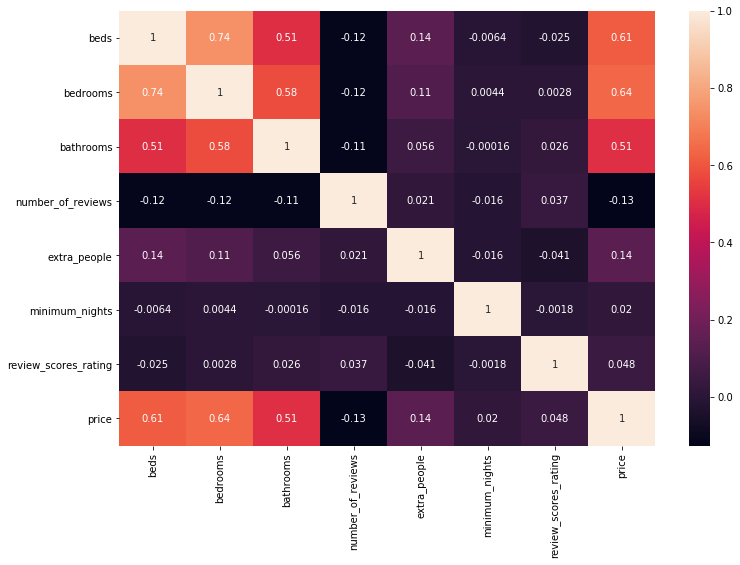

In [42]:
#using heatmap to see
plt.figure(figsize=(12,8))
sns.heatmap(df_listings1.corr(), annot=True,);